In [73]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows',None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)
import unicodedata

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
np.set_printoptions(threshold='nan')

In [74]:
df = pd.read_csv('train.tsv', sep='\t', index_col =None)
df

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Label,Id
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1,10101
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2,10102
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1,10103
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1,10104
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2,10105
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1,10106
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,1,10107
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201,1,10108
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201,1,10109
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2,10110


In [75]:
good = df[df["Label"]==1]    #good
bad = df[df["Label"]==2]    #bad

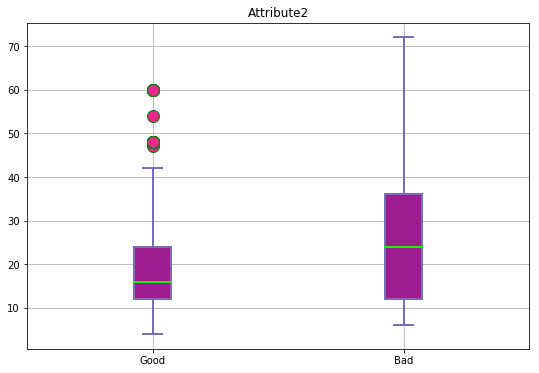

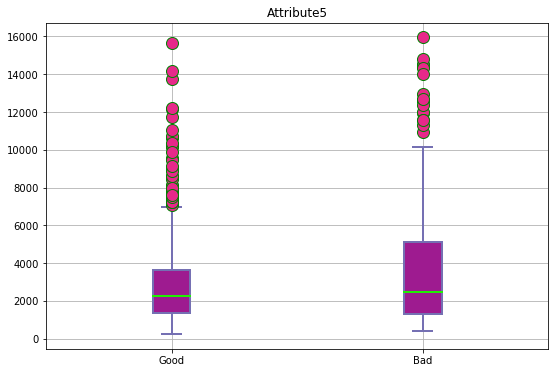

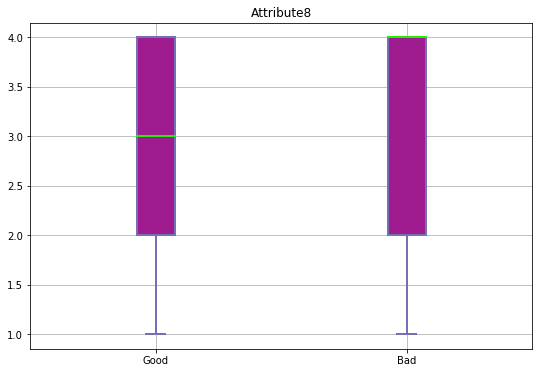

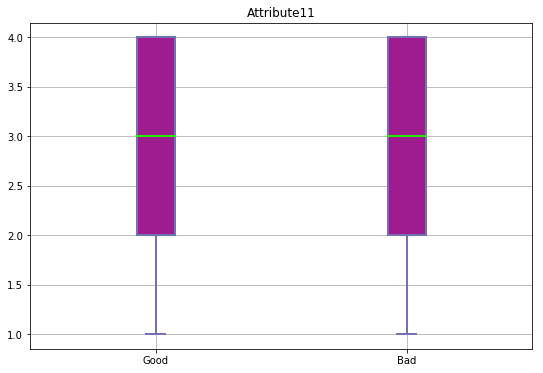

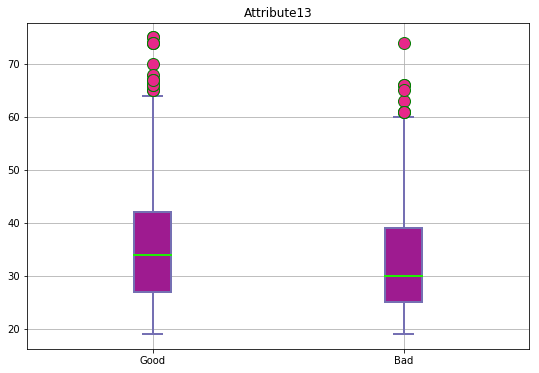

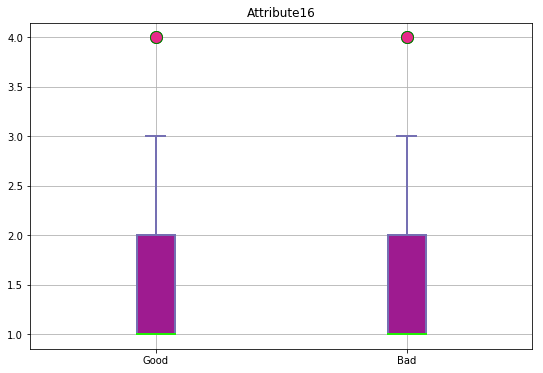

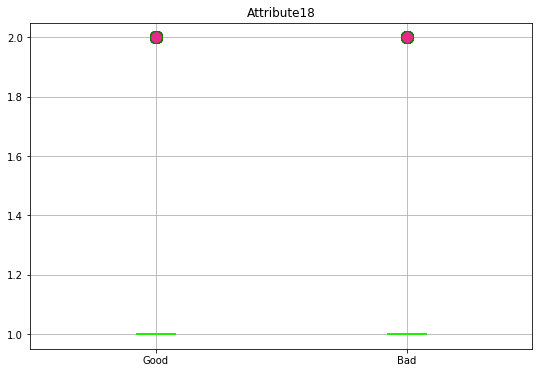

In [76]:
#Numericals
Attributes = ["Attribute2","Attribute5","Attribute8","Attribute11","Attribute13","Attribute16","Attribute18"]

for attribute in Attributes: 
    Attribute_good = good[[attribute]]
    Attribute_bad = bad[[attribute]]
    
    #convert data into list
    Attribute2_good = list(Attribute_good.values.flatten())
    Attribute2_bad = list(Attribute_bad.values.flatten())
    
    
    data_to_plot = [Attribute2_good, Attribute2_bad]

    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)


    # Create the boxplot
    ## change the style of fliers and their fill
    flierprops = dict(marker='o', markerfacecolor='#e7298a', markersize=12,
                  linestyle='none', markeredgecolor='g') 
    
    #Create the boxplot
    bp = ax.boxplot(data_to_plot, patch_artist=True, flierprops= flierprops)
    
    #Change color

    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set( facecolor = '#9e1b90' )

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#20ef04', linewidth=2)

    ## change the style of fliers and their fill
    #for flier in bp['fliers']:
     #   flier.set(marker='o', color='#e7298a', alpha=0.5)
        
      

    #Set grid
    ax.grid()

    #Set labels
    ax.set_xticklabels(['Good', 'Bad'])    

    #Set title
    plt.title(attribute)
    plt.show()

    # Save the figure
    #fig.savefig('fig1.png', bbox_inches='tight')


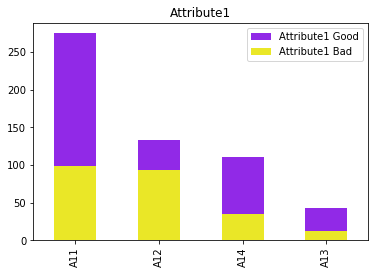

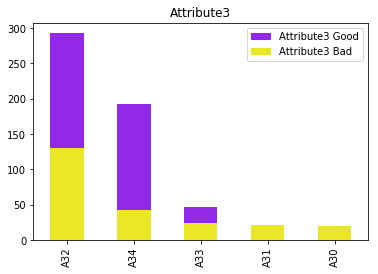

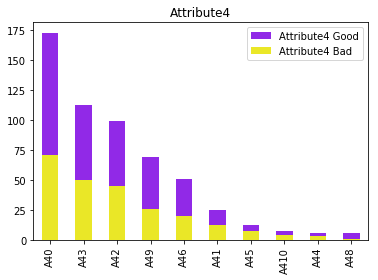

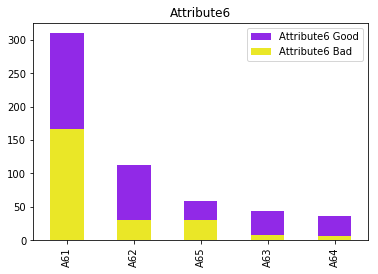

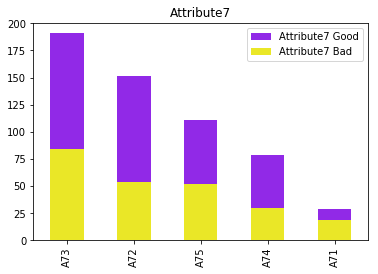

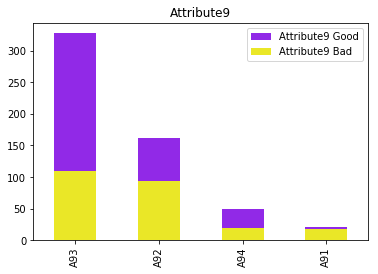

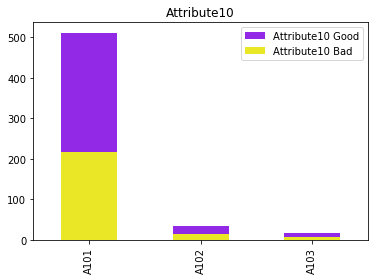

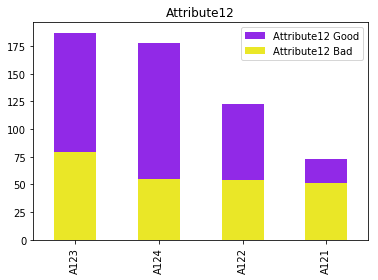

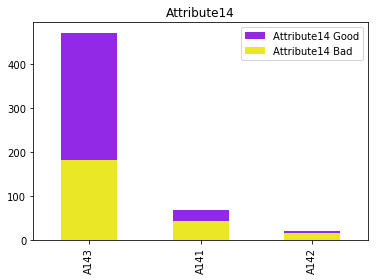

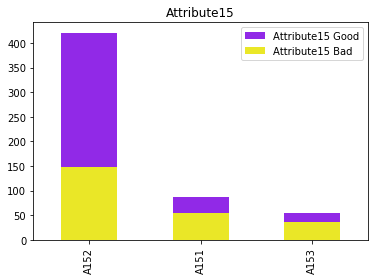

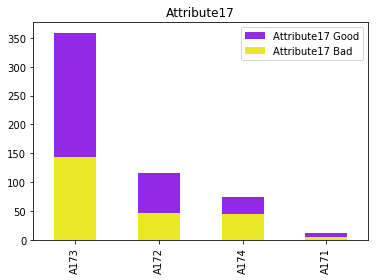

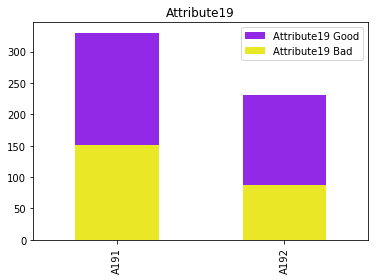

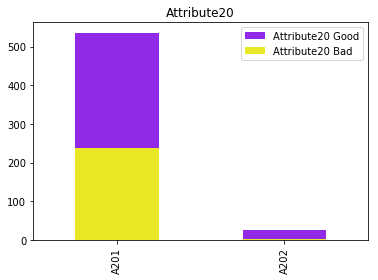

In [77]:
#for categorical data


attributesCategorical = ['Attribute1','Attribute3','Attribute4','Attribute6','Attribute7','Attribute9','Attribute10'
              ,'Attribute12','Attribute14','Attribute15','Attribute17','Attribute19','Attribute20']

for item in attributesCategorical:

    attributeGood = pd.Series(good[item])
    attributeBad = pd.Series(bad[item])
    stringGood = item + " Good"
    stringBad = item + " Bad"

    plt.title(item)
    attributeGood.value_counts().plot(kind='bar',label= stringGood, color = '#9129e7' )
    attributeBad.value_counts().plot(kind='bar',label= stringBad, color = '#eae727')
    plt.legend()
    plt.show()

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

withoutLabel = df.ix[:, df.columns != 'Label' ]
withoutLabelAndId = withoutLabel.ix[:, withoutLabel.columns != 'Id' ]

Count_Row = withoutLabelAndId.shape[0]

listOfDocuments= []
for i in range(Count_Row):
    documents = withoutLabelAndId.iloc[i]
    documents = documents.to_string(index=False , header = False).encode('utf8')
    listOfDocuments.append(documents)
    
    
tupleOfDocuments = tuple(listOfDocuments)


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(tupleOfDocuments)

#SVD
tfidf_matrix = np.array(TruncatedSVD(n_components=10).fit_transform(tfidf_matrix))
print tfidf_matrix

[[  3.50617401e-01   1.06621769e-01  -1.62072913e-01   1.07282153e-01
   -1.20604531e-01  -2.74401716e-02  -5.69722362e-03  -1.87874320e-02
   -8.68967778e-02  -9.54881259e-02]
 [  4.04793721e-01  -1.90584128e-01  -4.16084603e-03   1.39533518e-02
    1.31378189e-01  -1.85644333e-01  -1.08956611e-01  -3.65337582e-02
   -7.02574738e-02   6.49229385e-03]
 [  3.67744364e-01  -6.35045937e-02  -1.88056791e-01   2.32025210e-01
   -4.97285120e-02   1.36743212e-01   2.18175982e-03  -7.59452534e-02
    1.35392456e-01  -2.60842021e-02]
 [  3.20381666e-01  -5.96487840e-03   1.42395179e-01   1.19671427e-01
   -5.83786002e-02  -4.01172951e-02   8.84720142e-02   2.66431985e-01
   -3.28670072e-02  -1.20357457e-01]
 [  3.46961542e-01   1.53773082e-01   1.69780120e-01   1.74334664e-01
    1.93456893e-02  -1.26670632e-01  -1.81851797e-02   2.31820464e-01
    1.10609124e-01   1.61359334e-01]
 [  3.50339312e-01   2.90014921e-01   2.56168188e-02   1.62855005e-01
   -2.27111578e-02  -6.02266644e-02  -9.86754

In [79]:
X = np.array(tfidf_matrix)
y = []
for i in range(Count_Row):
    y.append(df["Label"].iloc[i]) 
    

y = np.array(y)

print y

[1 2 1 1 2 1 1 1 1 2 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1
 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 2 1 1 1 1 2 1 1 1 1 1
 2 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 1 1 2 1 1 2 1 2 1 2 1 1 1 2 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 2 2 1 1 1 1 2 2 2 1 2
 1 2 1 2 1 2 2 2 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2
 1 1 1 1 1 2 2 1 2 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1
 1 1 2 1 1 2 1 2 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 1 1 2
 2 1 2 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 2 2 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 2 1 

In [80]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import *


random_state = np.random.RandomState(0)
k_fold = KFold(n_splits=10,shuffle = True)

clf = SVC(kernel = 'linear' , C = 1.0, probability=True, random_state=random_state)
clf.fit(X, y)
accuracySVM = cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1 , scoring = 'accuracy')
accuracyMeanSVM =np.mean(accuracySVM)
print accuracySVM
print accuracyMeanSVM

clf = RandomForestClassifier(n_estimators=80)
clf.fit(X, y)
accuracyRF = cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1 , scoring = 'accuracy')
accuracyMeanRF =np.mean(accuracyRF)
print accuracyRF
print accuracyMeanRF

clf = GaussianNB()
clf.fit(X, y)
accuracyNB = cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1 , scoring = 'accuracy')
accuracyMeanNB =np.mean(accuracyNB)
print accuracyNB
print accuracyMeanNB

[ 0.7     0.65    0.725   0.6625  0.775   0.7     0.775   0.6875  0.625
  0.7125]
0.70125
[ 0.7625  0.8     0.7625  0.6875  0.7875  0.675   0.675   0.7125  0.6875
  0.7375]
0.72875
[ 0.575   0.775   0.7125  0.7625  0.7     0.7125  0.725   0.8     0.7125
  0.625 ]
0.71


In [81]:
import csv

with open('EvaluationMetric_10fold.csv', 'wb') as fp:
    writer = csv.writer(fp, delimiter='\t') 
    l = [(' ','Statistic Measure', 'Naive Bayes', 'Random Forest', 'SVM'),
         (' ','Accuracy', accuracyMeanNB, accuracyMeanRF, accuracyMeanSVM)]
    writer.writerows(l)
    
evalDf = pd.read_csv('EvaluationMetric_10fold.csv',sep='\t',encoding="utf-8",index_col=0)
evalDf

,Statistic Measure,Naive Bayes,Random Forest,SVM
,,,,
,Accuracy,0.71,0.72875,0.70125


In [82]:
dfTest = pd.read_csv('test.tsv',sep='\t',encoding="utf-8")

withoutId = dfTest.ix[:, dfTest.columns != 'Id' ]

withoutId



,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A12,18,A34,A43,1795,A61,A75,3,A92,A103,4,A121,48,A141,A151,2,A172,1,A192,A201
1,A11,20,A34,A42,4272,A61,A75,1,A92,A101,4,A122,24,A143,A152,2,A173,1,A191,A201
2,A14,12,A34,A43,976,A65,A75,4,A93,A101,4,A123,35,A143,A152,2,A173,1,A191,A201
3,A12,12,A32,A40,7472,A65,A71,1,A92,A101,2,A121,24,A143,A151,1,A171,1,A191,A201
4,A11,36,A32,A40,9271,A61,A74,2,A93,A101,1,A123,24,A143,A152,1,A173,1,A192,A201
5,A12,6,A32,A43,590,A61,A72,3,A94,A101,3,A121,26,A143,A152,1,A172,1,A191,A202
6,A14,12,A34,A43,930,A65,A75,4,A93,A101,4,A121,65,A143,A152,4,A173,1,A191,A201
7,A12,42,A31,A41,9283,A61,A71,1,A93,A101,2,A124,55,A141,A153,1,A174,1,A192,A201
8,A12,15,A30,A40,1778,A61,A72,2,A92,A101,1,A121,26,A143,A151,2,A171,1,A191,A201
9,A12,8,A32,A49,907,A61,A72,3,A94,A101,2,A121,26,A143,A152,1,A173,1,A192,A201


In [84]:
#figuring out categories for testSet

Count_RowTest = dfTest.shape[0]

listOfDocumentsTest= []
IdList = []
for i in range(Count_RowTest):
    documents = withoutId.iloc[i]
    IdList.append(dfTest['Id'].iloc[i])
    documents = documents.to_string(index=False , header = False).encode('utf8')
    listOfDocumentsTest.append(documents)
    
tupleOfDocumentsTest = tuple(listOfDocumentsTest)    

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrixTest = tfidf_vectorizer.fit_transform(tupleOfDocumentsTest)

#SVD
tfidf_matrixTest = np.array(TruncatedSVD(n_components = 10).fit_transform(tfidf_matrixTest))


clf = GaussianNB()
clf.fit(X, y)

categories = clf.predict(tfidf_matrixTest)

TestList = []

for i in range(len(categories)):
    if (categories[i]==1):
         TestList.append("Good")
    elif (categories[i]==2):
         TestList.append("Bad")

FinalTestList = zip(IdList, TestList)

with open('testSet_Predictions.csv', 'wb') as fp:
    writer = csv.writer(fp, delimiter='\t') 
    l = [(' ','Client_ID', 'Predicted_Label')]
    
    for item in FinalTestList:
        l.append((' ',item[0],item[1]))
         
    writer.writerows(l)
    
dfPredict = pd.read_csv('testSet_Predictions.csv',sep='\t',encoding="utf-8",index_col=0)
dfPredict    

,Client_ID,Predicted_Label
,,
,10902,Good
,10903,Good
,10904,Good
,10905,Good
,10906,Bad
,10907,Good
,10908,Good
,10909,Bad
,10910,Good
